In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import pandas as pd
# this data dict contains timestamps and the total followers accumulated at each timestamp
data_dict = pickle.load(open('./jkr_timestamps_vs_follower_gain.pkl', 'rb'))

xs = data_dict['timestamps']
ys = data_dict['follower_gain']

In [5]:
import datetime as dt

def parse_cursor(c: int) -> dt.datetime:
    # Credits to Stefan Mccabe; turns a Javascript cursor from Twitter into a Python unix timestamp 
    # returns a datetime object
    # our inspiration can be found at the link below (yes, really)
    # https://popzazzle.blogspot.com/2019/11/how-to-find-out-when-someone-followed-you-on-twitter.html
    if c == -1:
        return dt.datetime.now()
    if c == 0:
        return dt.datetime(2006, 1, 1, 0, 0, 0 ,0)
    if c < -2:
        c = -c
    a = 90595920000000
    b = 1230427978203430000
    d = c - b
    e = d / a
    # to get d, we need to multiply by a.
    f = dt.datetime(2007, 3, 9, 7, 51, 0, 0)
    return f + dt.timedelta(days=e) # subtract f from the unix timestamp;
    # we now have a dt.timedelta of e days.

In [39]:
from pytrends.request import TrendReq

# using the pytrends package to obtain Google Trends search interest data for JK Rowling
pytrends = TrendReq(hl='en', tz=360)

In [40]:
# building a payload of search interest data for the term "JK Rowling" from mid-2018 to 2023
pytrends.build_payload(['JK Rowling'], cat=0, timeframe='2018-06-15 2023-01-01', geo='', gprop='')

In [43]:
df = pytrends.interest_over_time()
df.head(5)

,JK Rowling,isPartial
date,,
2018-06-10,4,False
2018-06-17,4,False
2018-06-24,4,False
2018-07-01,5,False
2018-07-08,4,False


Text(0.5, 1.0, 'JK Rowling Search Interest & Follower Accumulation')

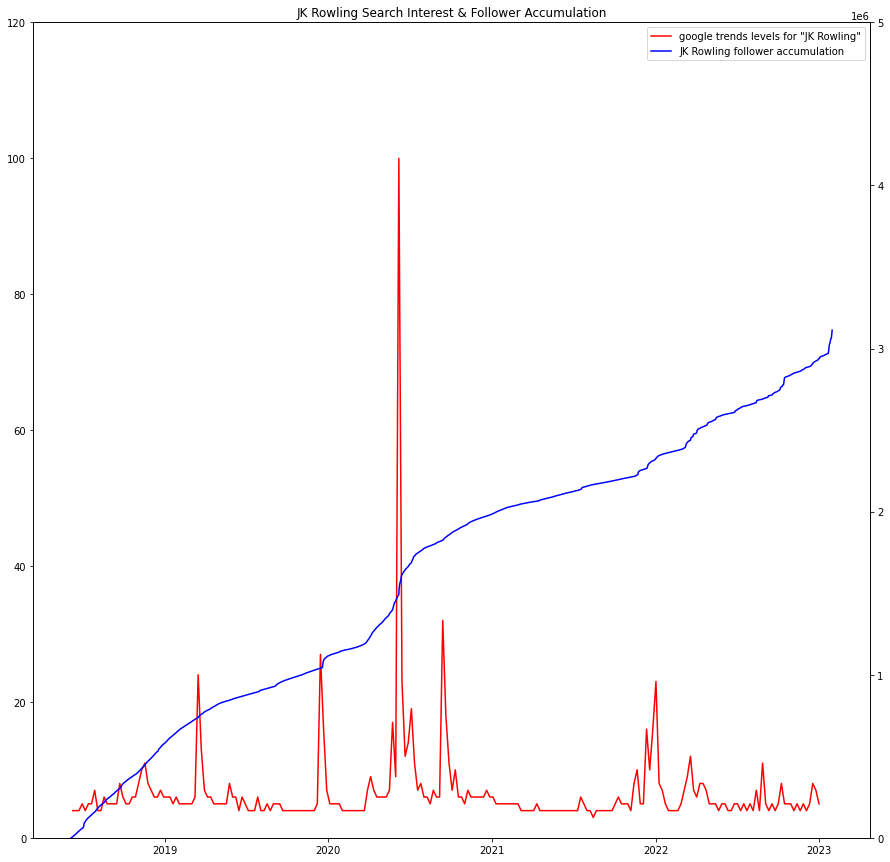

In [44]:
fig, host = plt.subplots(figsize=(15, 15))
host.set_ylim(0, 120)
ax3 = host.twinx()
ax3.set_ylim(0, 5 * 10e5)
p1 = host.plot(pd.to_datetime(df.index), df['JK Rowling'], color='red', label='google trends levels for "JK Rowling"')
p2 = ax3.plot(xs, ys, color='blue', label='JK Rowling follower accumulation')
host.legend(handles=p1+p2)
plt.title('JK Rowling Search Interest & Follower Accumulation') 